<center> 
# R401: Statistical and Mathematical Foundations

<br> <br> 

## <center> Introduction to Numerical Optimization

<br>

<center> **Andrey Vassilev**

<br> 


# Contents

- Introductory remarks
- A few notes on gradients
- Interactive numerical optimization examples: *[An Interactive Tutorial on Numerical Optimization](http://www.benfrederickson.com/numerical-optimization/)* by Ben Frederickson plus helper visualizations below

# Introductory remarks

- In most practical situations optimization is not carried out with pen and paper but using a computer.
- This implies that, while the burden of problem formulation always lies with the user, the technical aspects of finding a solution will typically comprise working with an appropriate programming interface rather than using analytical techniques.
- This is usually a worthwhile tradeoff as the computer allows us to solve vast problems and we are shielded from the complexities of analytical solutions.


- At the same time, the power and ease of use of software applications that solve optimization problems may mislead the user with respect to the reliability of the results and their interpretation.
- 

# Imports needed for the examples

In [1]:
%matplotlib notebook
from IPython.display import display, Math, Latex, HTML
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


plt.rcParams['figure.figsize'] = (10,8)

# A few notes on gradients

# Interactive numerical optimization examples

In [18]:
def plot3dim(fnum=1, 
             xlimlower=-7,xlimupper=7,
             ylimlower=-7,ylimupper=7,
             zlimlower=-5,zlimupper=50,
             contouroffset=-10, contourlevels = None,
             elevation=18, angle=-60, distance=12, 
             rstr=5, cstr=5, fontsize=15, alph = 0.3):
    x,y = np.meshgrid(np.linspace(xlimlower,xlimupper,200),np.linspace(ylimlower,ylimupper,200))
    if fnum == 1:
        f = lambda x,y : x**2 + y**2 + x*np.sin(y) + y*np.sin(x)
    elif fnum == 2:
        f = lambda x,y : (x**2+y-11)**2 + (x+y**2-7)**2
    elif fnum == 3:
        f = lambda x,y : (1-x)**2 + 100*(y-x**2)**2
    elif fnum == 4:
        f = lambda x,y : .26*(x**2+y**2)+.48*x*y

    z = f(x,y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')               # set the 3d axes
    ax.plot_surface(x, y, z, 
                    rstride=rstr, 
                    cstride=cstr, 
                    alpha=alph,                 # transparency of the surface 
                    cmap=cm.BuPu)               # colour map

    if contourlevels is None:
        cset = ax.contourf(x, y, z, 
                           zdir='z',                # direction of contour projection
                           offset=contouroffset,    # how "far" to render the contour map
                           cmap=cm.BuPu)            # colour map
    else:
        cset = ax.contourf(x, y, z, 
                           zdir='z',              
                           offset=contouroffset,
                           levels = contourlevels,
                           cmap=cm.BuPu)           
    ax.set_xlabel('$x$',fontsize=fontsize)
    ax.set_xlim(xlimlower, xlimupper)
    ax.set_ylabel('$y$',fontsize=fontsize)
    ax.set_ylim(ylimlower, ylimupper)
    ax.set_zlabel('$f(x,y)$',fontsize=fontsize)
    ax.set_zlim(zlimlower, zlimupper)

    ax.view_init(elev=elevation, azim=angle)           # elevation and angle
    ax.dist=distance   

    plt.show()


<IPython.core.display.Javascript object>


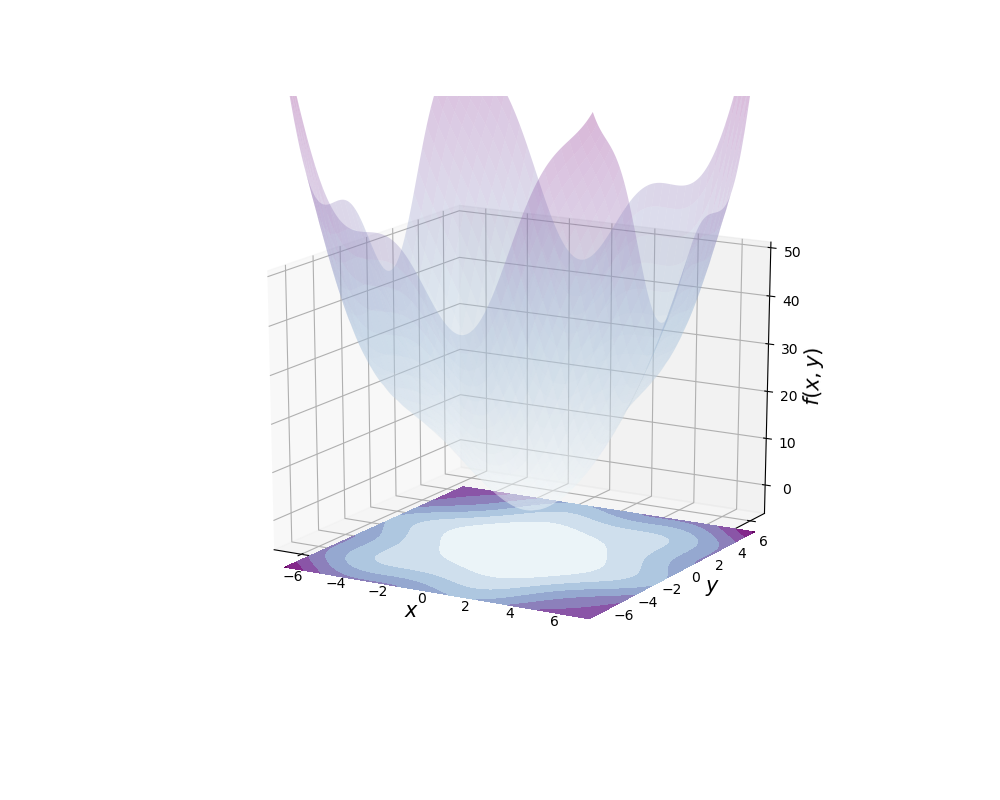

In [24]:
plot3dim(1)

<IPython.core.display.Javascript object>


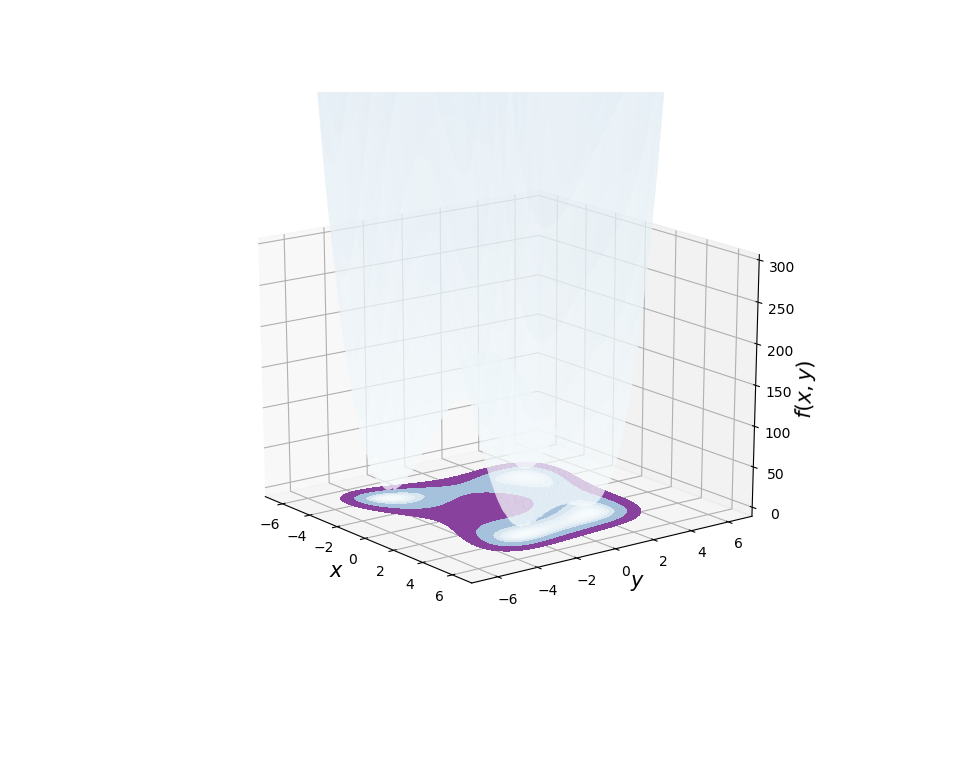

In [34]:
plot3dim(2,
         zlimlower=-5,zlimupper=300,
         contourlevels=[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,6,8,11,15,19,30,50,125,250],
         alph = 0.5)

<IPython.core.display.Javascript object>


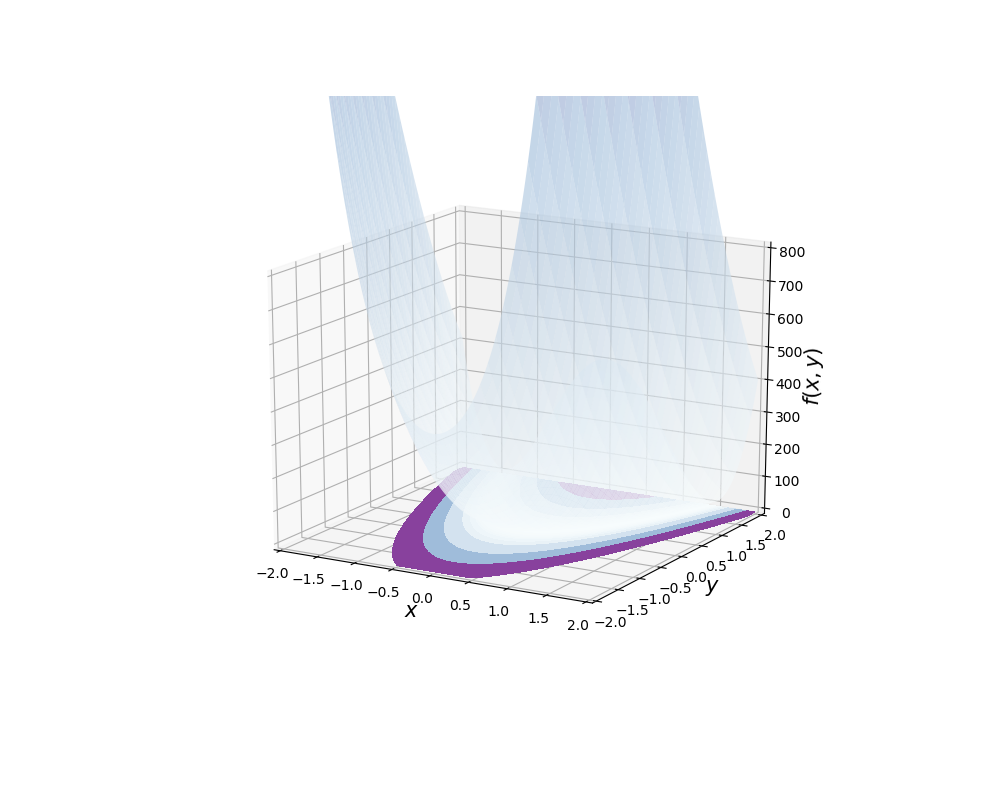

In [37]:
plot3dim(3, 
         xlimlower=-2,xlimupper=2,
         ylimlower=-2,ylimupper=2,
         zlimlower=0,zlimupper=800,
         contourlevels=[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,6,8,11,15,19,30,50,125,250,500],
         alph = 0.6)

<IPython.core.display.Javascript object>


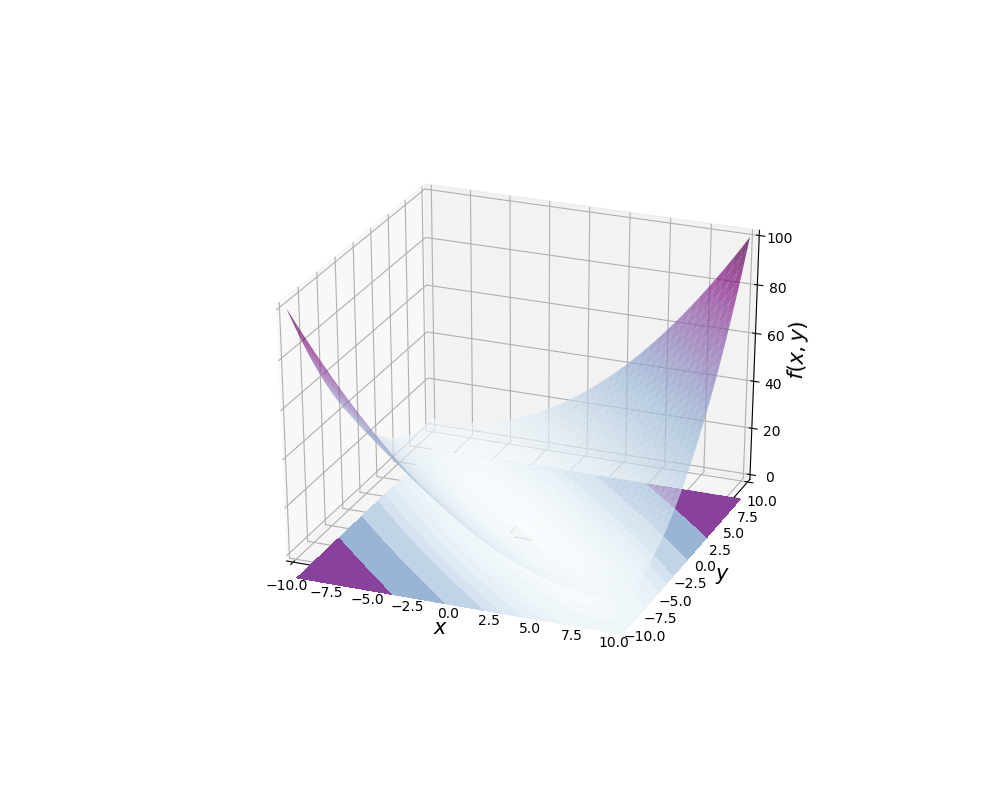

In [35]:
plot3dim(4, 
         xlimlower=-10,xlimupper=10,
         ylimlower=-10,ylimupper=10,
         zlimlower=0,zlimupper=100,
         contourlevels=[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,6,8,11,15,19,30,50,100],
         alph = 0.7)